In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import log_loss, make_scorer
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [2]:
!ls

Newspopularity.ipynb  OnlineNewsPopularity.csv	OnlineNewsPopularity.zip


In [3]:
df = pd.read_csv('OnlineNewsPopularity.csv')

In [4]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [5]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [149]:
df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [158]:
shares_by_days = np.array(df.groupby([' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday'])[' shares'].sum())

In [163]:
shares_by_days.sum()

134606452

In [161]:
shares_by_days_df = pd.DataFrame(shares_by_days.reshape(1,7), columns=['monday','tuesday','wednesday','thursday','friday','saturday','sunday'])

In [226]:
shares_by_days_df

,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,10254829,10003788,18728817,23098880,24560819,23666480,24292839


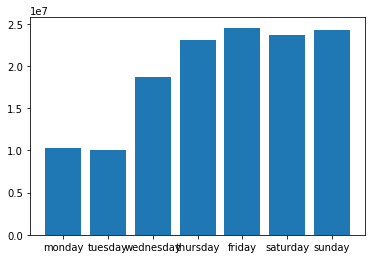

In [170]:
plt.bar(shares_by_days_df.columns, height = shares_by_days_df.iloc[0,:]);

In [172]:
shares_by_channels = np.array(df.groupby([' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world'])[' shares'].sum())

In [174]:
shares_by_channels

array([36467793, 19278735, 22568993,  8431057, 19168370, 20962727,
        7728777])

In [203]:
cols = ['lifestyle','entertainment','bus','socmed','tech','world','other'][::-1]
shares_by_channels_df = pd.DataFrame(shares_by_channels.reshape(1,7), columns= cols)

In [206]:
shares_by_channels_df

,other,world,tech,socmed,bus,entertainment,lifestyle
0,36467793,19278735,22568993,8431057,19168370,20962727,7728777


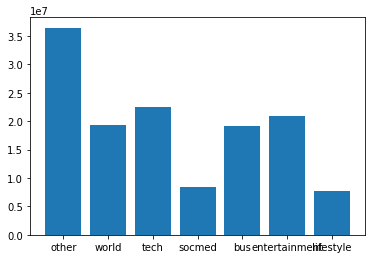

In [210]:
plt.bar(shares_by_channels_df.columns, height = shares_by_channels_df.iloc[0,:]);

In [182]:
df.groupby([' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world']).sum()

timedelta  \
 data_channel_is_lifestyle  data_channel_is_entertainment  data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech  data_channel_is_world               
0.0                        0.0                            0.0                  0.0                     0.0                   0.0                      2222422.0   
                                                                                                                             1.0                      2396259.0   
                                                                                                       1.0                   0.0                      2879092.0   
                                                                               1.0                     0.0                   0.0                       975696.0   
                                                          1.0                  0.0                     0.0                   0.0                      2391348.0   
                           1.0                            0.0                  0.0                     0.0                   0.0                      2342431.0   
1.0                        0.0                            0.0                  0.0                     0.0                   0.0                       847758.0   

                                                                                                                                                      n_tokens_title  \
 data_channel_is_lifestyle  data_channel_is_entertainment  data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech  data_channel_is_world                    
0.0                        0.0                            0.0                  0.0                     0.0                   0.0                             63201.0   
                                                                                                                             1.0                             89318.0   
                                                                                                       1.0                   0.0                             74868.0   
                                                                               1.0                     0.0                   0.0                             22377.0   
                                                          1.0                  0.0                     0.0                   0.0                             64345.0   
                           1.0                            0.0                  0.0                     0.0                   0.0                             77641.0   
1.0                        0.0                            0.0                  0.0                     0.0                   0.0                             20498.0   

                                                                                                                                                      n_tokens_content  \
 data_channel_is_lifestyle  data_channel_is_entertainment  data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech  data_channel_is_world                      
0.0                        0.0                            0.0                  0.0                     0.0                   0.0                             2047992.0   
                                                                                                                             1.0                             5033290.0   
                                                                                                       1.0                   0.0                             4199074.0   
                                                                               1.0                     0.0                   0.0                             1416166.0   
                                                          1.0                  0.0                     0.0                   0.0                     

In [220]:
df[(df[' data_channel_is_lifestyle']==0)&(df[' data_channel_is_entertainment']==0)&
  (df[' data_channel_is_bus']==0)&(df[' data_channel_is_socmed']==0)&
  (df[' data_channel_is_tech']==0)&(df[' data_channel_is_world']==0)][' shares'].sum()

36467793

In [224]:
df[(df[' is_weekend'] == 0)|(df[' is_weekend'] == 1)][' shares'].sum()

134606452

In [214]:
shares_by_ifweekdays = np.array(df.groupby([' is_weekend'])[' shares'].sum())

In [215]:
shares_by_ifweekdays

array([114347835,  20258617])

In [218]:
shares_by_ifweekdays_df = pd.DataFrame(shares_by_ifweekdays.reshape(1,2), columns=['Weekday','Weekend'])

In [227]:
shares_by_ifweekdays_df

,Weekday,Weekend
0,114347835,20258617


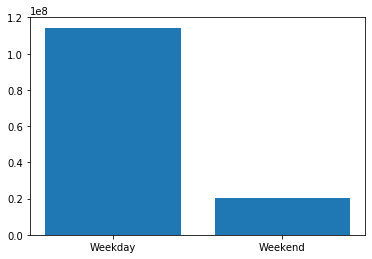

In [230]:
plt.bar(shares_by_ifweekdays_df.columns, height = shares_by_ifweekdays_df.iloc[0,:]);

In [238]:
len(df[df[' shares']>1400])/len(df)

0.4934416305115528

In [7]:
df_1 = df[(df[' shares'] <10000)]
df_2 = df[(df[' shares'] >10000)]

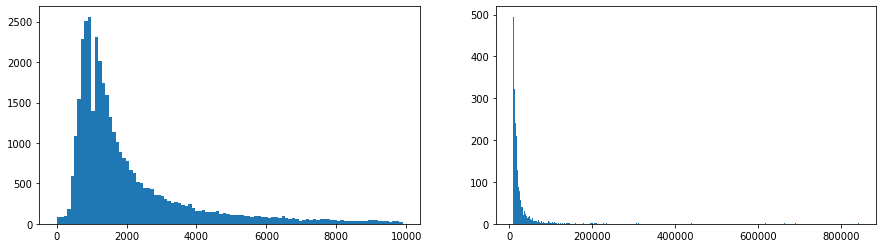

In [99]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,4))
ax1.hist(df_1[' shares'], bins =100)
ax2.hist(df_2[' shares'], bins =400);

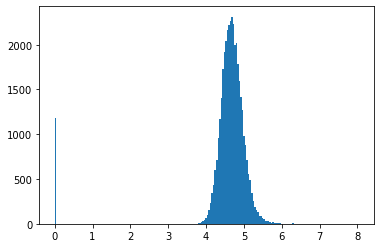

In [9]:
plt.hist(df[' average_token_length'], bins=200);

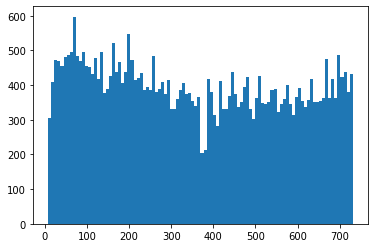

In [10]:
plt.hist(df[' timedelta'], bins=100);

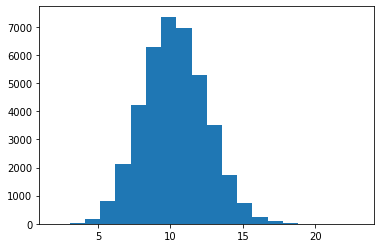

In [11]:
 plt.hist(df[' n_tokens_title'], bins=20);

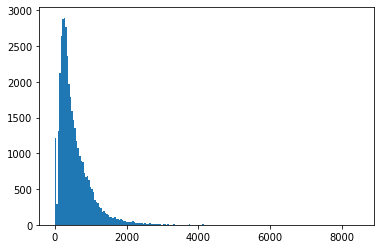

In [12]:
 plt.hist(df[' n_tokens_content'], bins=200);

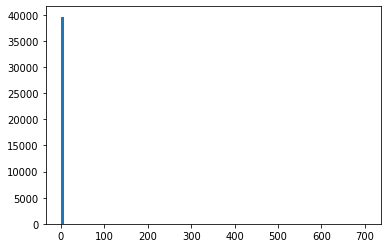

In [13]:
 plt.hist(df[' n_unique_tokens'], bins=100);

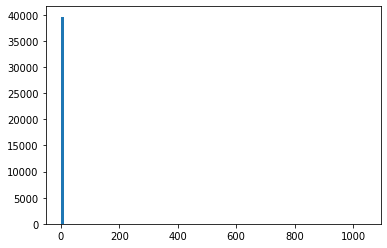

In [14]:
  plt.hist(df[' n_non_stop_words'], bins=100);

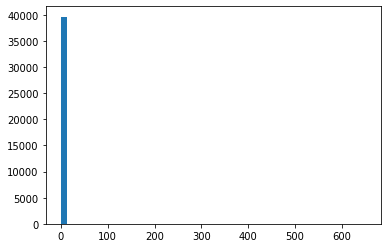

In [15]:
  plt.hist(df[' n_non_stop_unique_tokens'], bins=50);

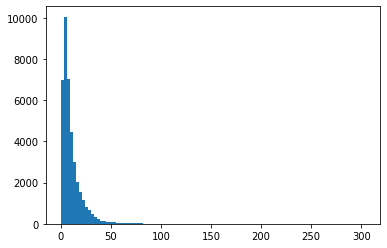

In [16]:
plt.hist(df[' num_hrefs'], bins=100);

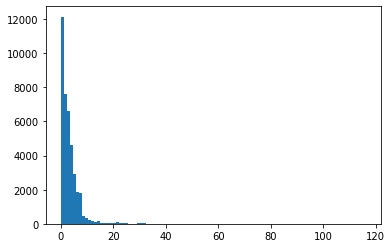

In [17]:
 plt.hist(df[' num_self_hrefs'], bins=100);

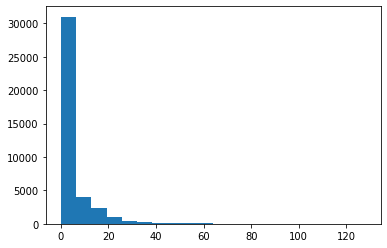

In [18]:
plt.hist(df[' num_imgs'], bins=20);

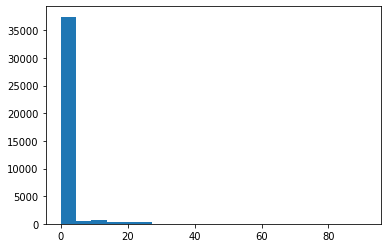

In [19]:
plt.hist(df[' num_videos'], bins=20);

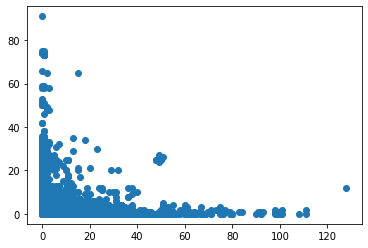

In [20]:
plt.scatter(df[' num_imgs'], df[' num_videos'])

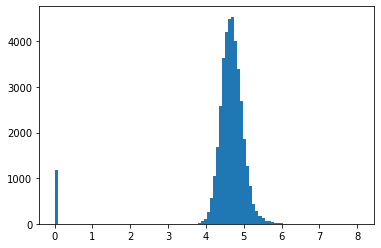

In [21]:
plt.hist(df[' average_token_length'], bins=100);

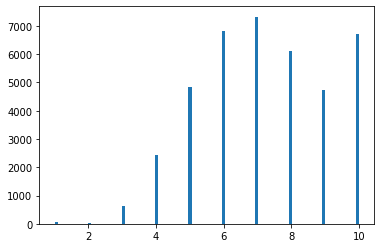

In [22]:
plt.hist(df[' num_keywords'], bins=100);

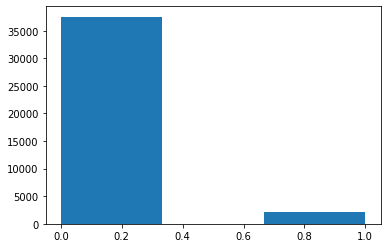

In [23]:
plt.hist(df[' data_channel_is_lifestyle'], bins=3);

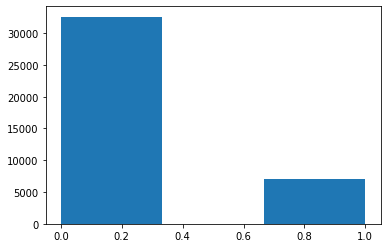

In [24]:
plt.hist(df[' data_channel_is_entertainment'], bins=3);

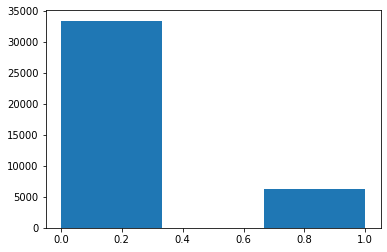

In [25]:
plt.hist(df[' data_channel_is_bus'], bins=3);

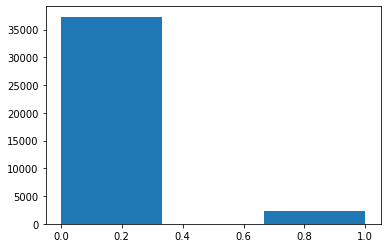

In [26]:
plt.hist(df[' data_channel_is_socmed'], bins=3);

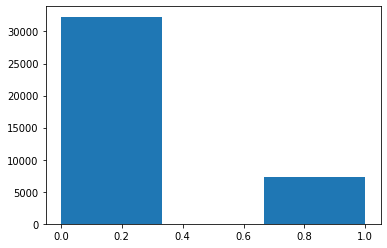

In [27]:
plt.hist(df[' data_channel_is_tech'], bins=3);

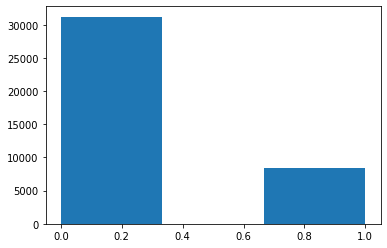

In [28]:
plt.hist(df[' data_channel_is_world'], bins=3);

In [29]:
print('Lifestle {}'.format(df[df[' data_channel_is_lifestyle']==1]['url'].count()))
print('Entertainment {}'.format(df[df[' data_channel_is_entertainment']==1]['url'].count()))
print('Bus {}'.format(df[df[' data_channel_is_bus']==1]['url'].count()))
print('SocialMedia {}'.format(df[df[' data_channel_is_socmed']==1]['url'].count()))
print('Tech {}'.format(df[df[' data_channel_is_tech']==1]['url'].count()))
print('Worls {}'.format(df[df[' data_channel_is_world']==1]['url'].count()))



Lifestle 2099
Entertainment 7057
Bus 6258
SocialMedia 2323
Tech 7346
Worls 8427


timedelta  \
 data_channel_is_lifestyle  data_channel_is_entertainment  data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech  data_channel_is_world               
0.0                        0.0                            0.0                  0.0                     0.0                   0.0                      2222422.0   
                                                                                                                             1.0                      2396259.0   
                                                                                                       1.0                   0.0                      2879092.0   
                                                                               1.0                     0.0                   0.0                       975696.0   
                                                          1.0                  0.0                     0.0                   0.0                      2391348.0   
                           1.0                            0.0                  0.0                     0.0                   0.0                      2342431.0   
1.0                        0.0                            0.0                  0.0                     0.0                   0.0                       847758.0   

                                                                                                                                                      n_tokens_title  \
 data_channel_is_lifestyle  data_channel_is_entertainment  data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech  data_channel_is_world                    
0.0                        0.0                            0.0                  0.0                     0.0                   0.0                             63201.0   
                                                                                                                             1.0                             89318.0   
                                                                                                       1.0                   0.0                             74868.0   
                                                                               1.0                     0.0                   0.0                             22377.0   
                                                          1.0                  0.0                     0.0                   0.0                             64345.0   
                           1.0                            0.0                  0.0                     0.0                   0.0                             77641.0   
1.0                        0.0                            0.0                  0.0                     0.0                   0.0                             20498.0   

                                                                                                                                                      n_tokens_content  \
 data_channel_is_lifestyle  data_channel_is_entertainment  data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech  data_channel_is_world                      
0.0                        0.0                            0.0                  0.0                     0.0                   0.0                             2047992.0   
                                                                                                                             1.0                             5033290.0   
                                                                                                       1.0                   0.0                             4199074.0   
                                                                               1.0                     0.0                   0.0                             1416166.0   
                                                          1.0                  0.0                     0.0                   0.0                     

In [31]:
df_3 = df.iloc[:100,19:28]

In [32]:
df_3

,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg
0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
1,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
2,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
3,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
4,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
95,217.0,598.0,469.333333,0.0,17100.0,4600.000000,0.0,1953.144444,848.688889
96,217.0,690.0,572.000000,0.0,17100.0,3110.000000,0.0,2322.500000,831.510494
97,217.0,462.0,279.125000,1300.0,17100.0,13950.000000,726.6,2339.520000,1777.330599
98,217.0,761.0,517.000000,0.0,17100.0,3932.625000,0.0,4151.000000,858.143056


In [33]:
df_3.columns

Index([' kw_min_min', ' kw_max_min', ' kw_avg_min', ' kw_min_max',
       ' kw_max_max', ' kw_avg_max', ' kw_min_avg', ' kw_max_avg',
       ' kw_avg_avg'],
      dtype='object')

In [34]:
df.groupby([' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend']).count()

url  \
 weekday_is_monday  weekday_is_tuesday  weekday_is_wednesday  weekday_is_thursday  weekday_is_friday  weekday_is_saturday  weekday_is_sunday  is_weekend         
0.0                0.0                 0.0                   0.0                  0.0                0.0                  1.0                1.0          2737   
                                                                                                     1.0                  0.0                1.0          2453   
                                                                                  1.0                0.0                  0.0                0.0          5701   
                                                             1.0                  0.0                0.0                  0.0                0.0          7267   
                                       1.0                   0.0                  0.0                0.0                  0.0                0.0          7435   
                   1.0                 0.0                   0.0                  0.0                0.0                  0.0                0.0          7390   
1.0                0.0                 0.0                   0.0                  0.0                0.0                  0.0                0.0          6661   

                                                                                                                                                           timedelta  \
 weekday_is_monday  weekday_is_tuesday  weekday_is_wednesday  weekday_is_thursday  weekday_is_friday  weekday_is_saturday  weekday_is_sunday  is_weekend               
0.0                0.0                 0.0                   0.0                  0.0                0.0                  1.0                1.0                2737   
                                                                                                     1.0                  0.0                1.0                2453   
                                                                                  1.0                0.0                  0.0                0.0                5701   
                                                             1.0                  0.0                0.0                  0.0                0.0                7267   
                                       1.0                   0.0                  0.0                0.0                  0.0                0.0                7435   
                   1.0                 0.0                   0.0                  0.0                0.0                  0.0                0.0                7390   
1.0                0.0                 0.0                   0.0                  0.0                0.0                  0.0                0.0                6661   

                                                                                                                                                           n_tokens_title  \
 weekday_is_monday  weekday_is_tuesday  weekday_is_wednesday  weekday_is_thursday  weekday_is_friday  weekday_is_saturday  weekday_is_sunday  is_weekend                    
0.0                0.0                 0.0                   0.0                  0.0                0.0                  1.0                1.0                     2737   
                                                                                                     1.0                  0.0                1.0                     2453   
                                                                                  1.0                0.0                  0.0                0.0                     5701   
                                                             1.0                  0.0                0.0                  0.0                0.0                     7267   
                                       1.0                   0.0                  0.0                0.0                  0.0                0.0 

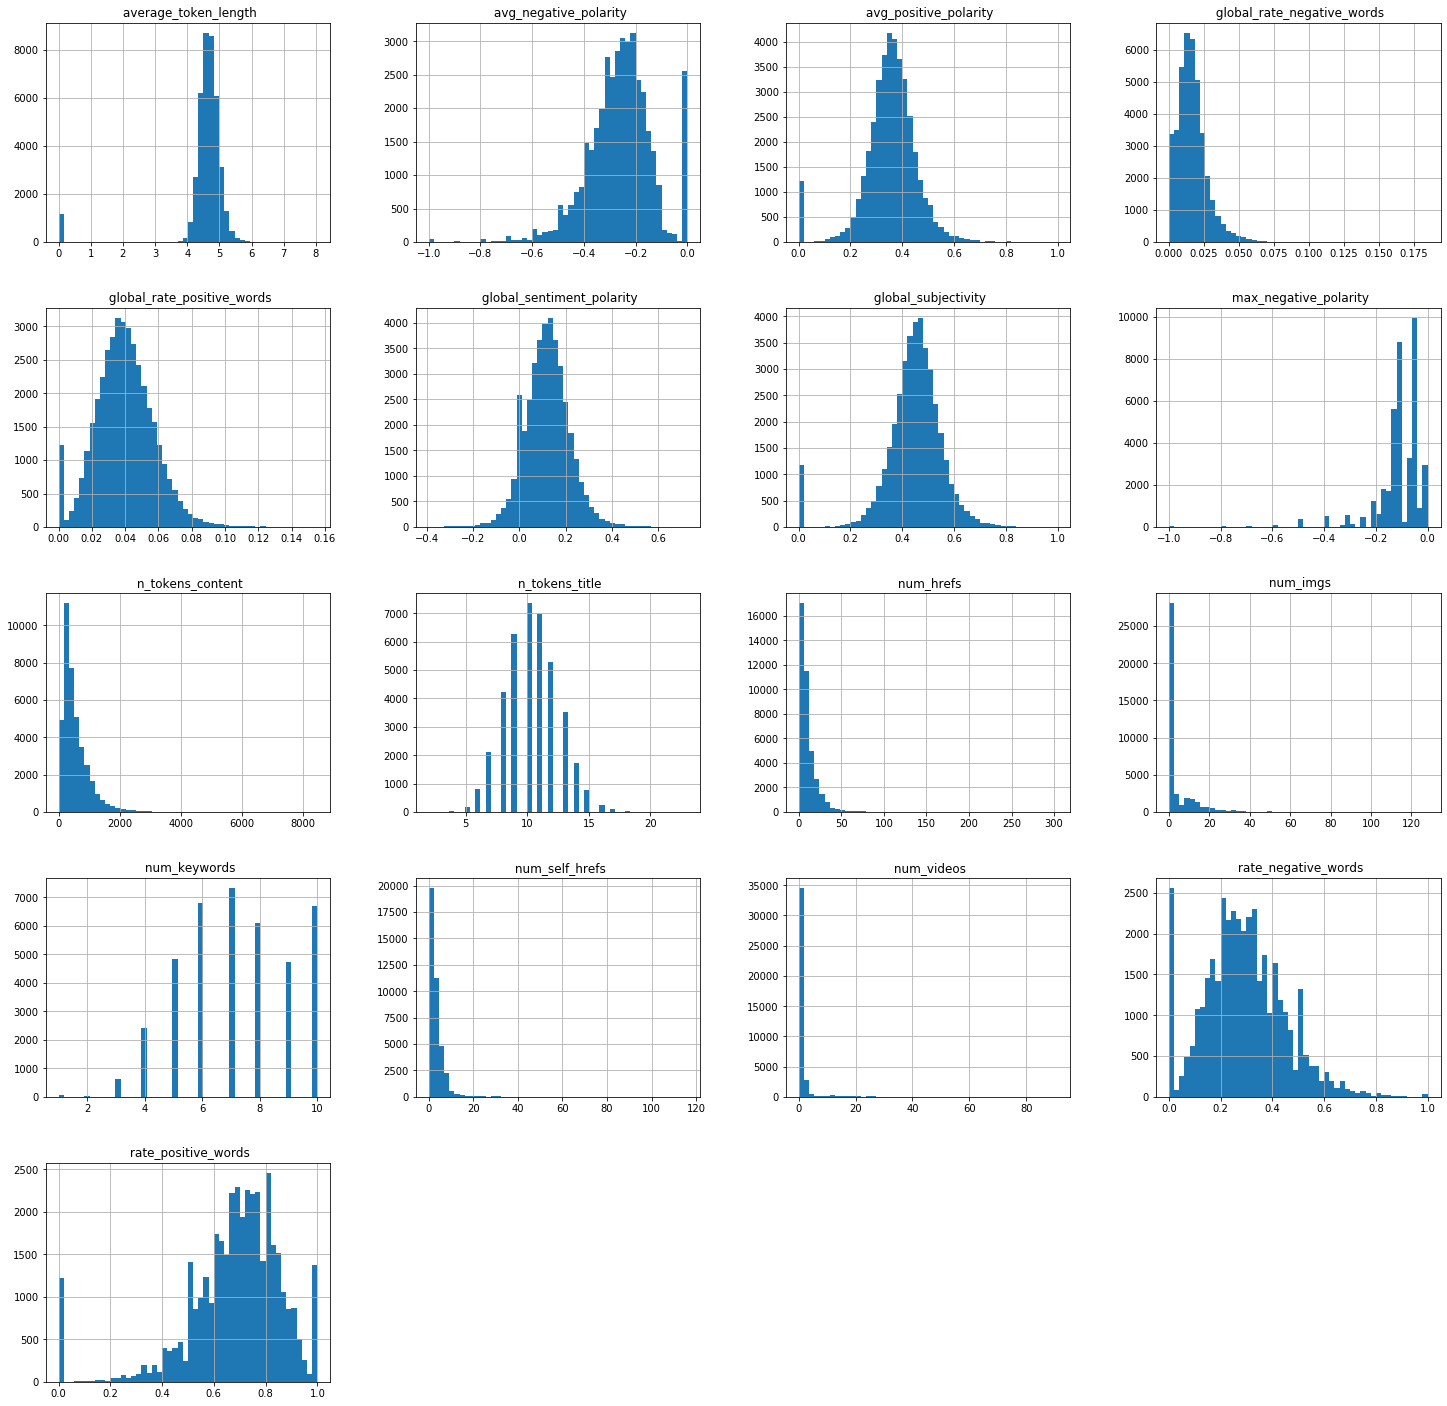

In [35]:
df.iloc[:,[2,3,7,8,9,10,11,12,44,45,46,47,48,49,50,53,55]].hist(figsize=(25,25),bins=50);

In [36]:
# pd.plotting.scatter_matrix(df, figsize = (10,10), alpha=0.2)

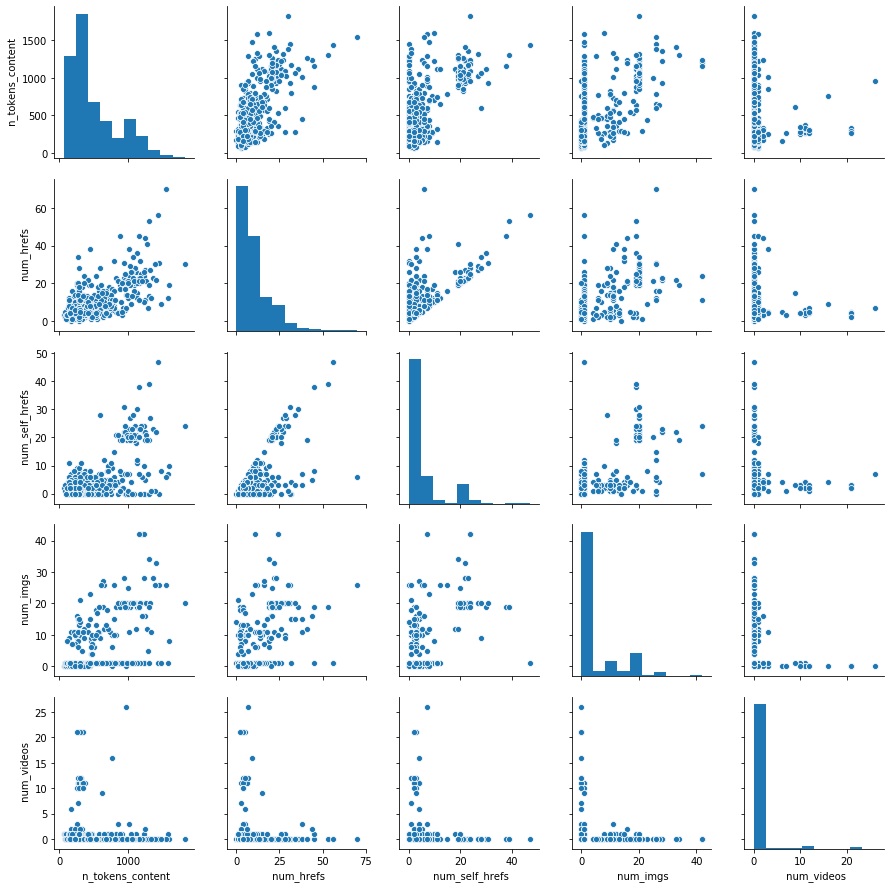

In [37]:
g = sns.pairplot(df.iloc[:500,[3,7,8,9,10]])

In [38]:
X = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

In [39]:
X.shape

(39644, 59)

In [40]:
y.shape

(39644,)

In [144]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33)

In [132]:
rf = RandomForestRegressor(n_estimators =100, max_depth=5, max_features = 5,criterion='mse',random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features=5, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [145]:
y_pred = rf.predict(X_test)

In [147]:
y_pred

array([2271.08593453, 2635.81224995, 2576.96145199, ..., 4069.02523425,
       6998.69953179, 2924.66058889])

In [148]:
y_test

array([ 863, 3000, 7200, ..., 3600, 5600,  262])

In [136]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.031212285200204803

In [143]:
rf.score(X_train,y_train)

0.22876472237178402

In [46]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
# all cpus are being used by setting n_jobs = -1
model = RandomForestRegressor(n_jobs=-1)

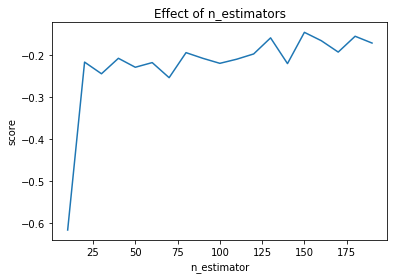

In [48]:
# estimators = np.arange(10, 200, 10)
# scores = []
# for n in estimators:
#     model.set_params(n_estimators=n)
#     model.fit(X_train, y_train)
#     scores.append(model.score(X_test, y_test))
# plt.title("Effect of n_estimators")
# plt.xlabel("n_estimator")
# plt.ylabel("score")
# plt.plot(estimators, scores)

In [51]:
mse_test = mean_squared_error(y_test, model.predict(X_test))
mse_test

75327996.72710508

In [52]:
model2 = RandomForestRegressor(n_jobs=-1, n_estimators=100)

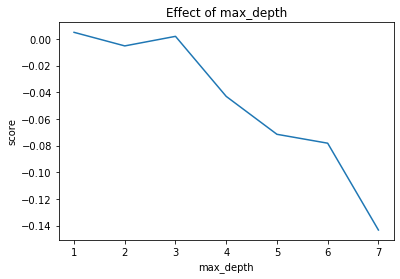

In [56]:
max_depth = np.arange(1, 8)
scores = []
for n in max_depth:
    model2.set_params(max_depth=n)
    model2.fit(X_train, y_train)
    scores.append(model2.score(X_test, y_test))
plt.title("Effect of max_depth")
plt.xlabel("max_depth")
plt.ylabel("score")
plt.plot(max_depth, scores)

In [57]:
model3 = RandomForestRegressor(n_jobs=-1, n_estimators=100,max_depth =3)

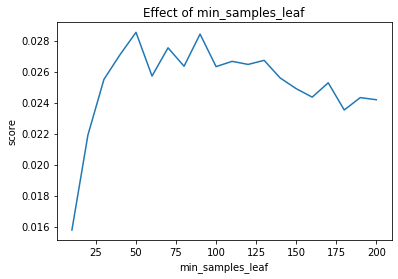

In [61]:
min_sample_leaf = np.arange(10, 210, 10)
scores = []
for n in min_sample_leaf:
    model3.set_params(min_samples_leaf=n)
    model3.fit(X_train, y_train)
    scores.append(model3.score(X_test, y_test))
plt.title("Effect of min_samples_leaf")
plt.xlabel("min_samples_leaf")
plt.ylabel("score")
plt.plot(min_sample_leaf, scores)

In [62]:
model4 = RandomForestRegressor(n_jobs=-1, max_depth=3, n_estimators=1000, min_samples_leaf=50)

In [ ]:
# model4.fit(X_train, y_train)

In [64]:
model4.score(X_test, y_test)

0.027882432285132097

In [76]:
model5 = RandomForestRegressor(n_jobs=-1, max_depth=3,max_features= 10, n_estimators=1000, min_samples_leaf=50, min_samples_split=20)

In [77]:
model5.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
                      max_features=10, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=50, min_samples_split=20,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [78]:
model5.score(X_test,y_test)

0.030178904006796792

In [79]:
model5.score(X_train, y_train)

0.028312423040090073

In [82]:
df.iloc[:,1:-1]

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.378636,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.286915,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.495833,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.385965,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.411127,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,...,0.333791,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000
39640,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,...,0.374825,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000
39641,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,...,0.307273,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364
39642,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,...,0.236851,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000


In [90]:
X_train.shape

(26561, 59)

In [103]:
X1 = df.iloc[:3000,1:7]
y1 = df.iloc[:3000,-1]

In [104]:
X1 = X1.values
y1 = y1.values

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.33,
                                                    random_state=0)

In [106]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [114]:
model5 = RandomForestRegressor(n_jobs=-1, max_depth=3,max_features= 20,
                               n_estimators=100, min_samples_leaf=5,
                               min_samples_split=5)

In [115]:
model5.fit(X_train, y_train)
model5.score(X_test,y_test)

0.020973745054550297

In [110]:
X1.shape

(3000, 6)

In [111]:
X1

array([[7.31000000e+02, 1.20000000e+01, 2.19000000e+02, 6.63594467e-01,
        9.99999992e-01, 8.15384609e-01],
       [7.31000000e+02, 9.00000000e+00, 2.55000000e+02, 6.04743081e-01,
        9.99999993e-01, 7.91946303e-01],
       [7.31000000e+02, 9.00000000e+00, 2.11000000e+02, 5.75129531e-01,
        9.99999992e-01, 6.63865541e-01],
       ...,
       [6.80000000e+02, 6.00000000e+00, 2.63400000e+03, 2.27949599e-01,
        9.99999999e-01, 3.47645429e-01],
       [6.80000000e+02, 1.00000000e+01, 3.11000000e+02, 5.77419353e-01,
        9.99999994e-01, 7.74566470e-01],
       [6.80000000e+02, 1.50000000e+01, 3.02000000e+02, 5.85858584e-01,
        9.99999994e-01, 7.49999996e-01]])

In [239]:
from sklearn.decomposition import PCA

In [243]:
pcd = PCA(2).fit(X)
pcd.explained_variance_ratio_

array([0.76282388, 0.16383036])

In [244]:
X.shape

(39644, 59)

In [245]:
X_reduced = X @ pcd.components_.T

In [246]:
X_reduced.shape

(39644, 2)

Text(0, 0.5, 'Second Principal Component')

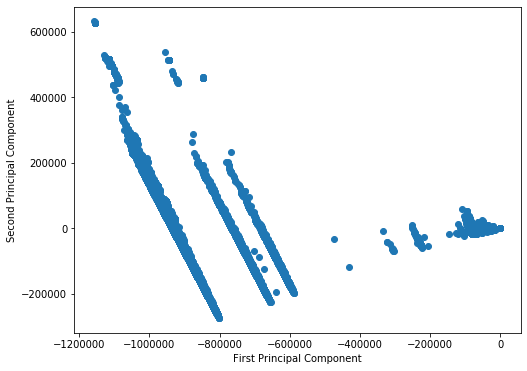

In [257]:
fig, ax = plt.subplots(1, figsize=(8, 6))

ax.scatter(X_reduced[:, 0], X_reduced[:, 1])
ax.set_xlabel("First Principal Component")
ax.set_ylabel("Second Principal Component")

In [250]:
df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [262]:
df_only_days = df.iloc[:,[31,32,33,34,35,36,37,38,-1]]

In [263]:
df_only_days

,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,shares
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,593
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,711
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1500
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1200
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,505
...,...,...,...,...,...,...,...,...,...
39639,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1800
39640,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1900
39641,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1900
39642,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1100
